TASK-1

Data manipulation
Use pandas' pivot and pivot_table functions to perform advanced data reshaping operations.

In [3]:
import pandas as pd

data={
    "Date": ["2025-01-01", "2025-01-01", "2025-01-02", "2025-01-02", "2025-01-03", "2025-01-03"],
    "City": ["Delhi", "Mumbai", "Delhi", "Mumbai", "Delhi", "Mumbai"],
    "Temperature": [22, 28, 21, 30, 20, 29],
    "Humidity": [60, 65, 55, 70, 50, 68]
}

df=pd.DataFrame(data)
print("Original DataFrame: \n",df)



Original DataFrame: 
          Date    City  Temperature  Humidity
0  2025-01-01   Delhi           22        60
1  2025-01-01  Mumbai           28        65
2  2025-01-02   Delhi           21        55
3  2025-01-02  Mumbai           30        70
4  2025-01-03   Delhi           20        50
5  2025-01-03  Mumbai           29        68


In [ ]:
# using pivot for temperature

pivot_df=df.pivot(index="Date",columns="City", values="Temperature")
print("Pivot Example(Temperature by Date & City):\n",pivot_df)

Pivot Example(Temperature by Date & City):
 City        Delhi  Mumbai
Date                     
2025-01-01     22      28
2025-01-02     21      30
2025-01-03     20      29


In [5]:
# using pivot_table()
pivot_table_df = df.pivot_table(
    index="Date",
    columns="City",
    values="Humidity",
    aggfunc="mean"
)
print("Pivot Table Example (Avg Humidity by Date & City):\n", pivot_table_df)


Pivot Table Example (Avg Humidity by Date & City):
 City        Delhi  Mumbai
Date                     
2025-01-01   60.0    65.0
2025-01-02   55.0    70.0
2025-01-03   50.0    68.0


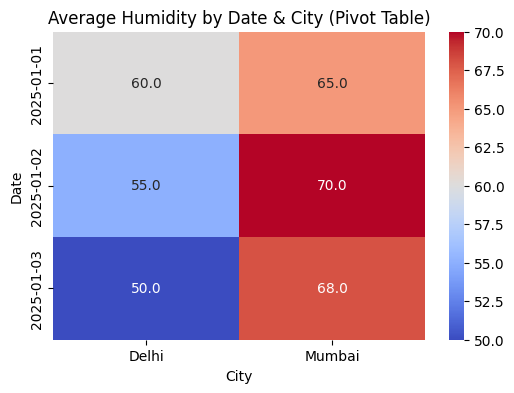

In [10]:
# pivot table for humidity
import matplotlib.pyplot as plt
import seaborn as sns

pivot_table_df = df.pivot_table(
    index="Date",
    columns="City",
    values="Humidity",
    aggfunc="mean"
)

# Plot Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(pivot_table_df, annot=True, cmap="coolwarm", fmt=".1f")  
plt.title("Average Humidity by Date & City (Pivot Table)")
plt.show()



In [14]:
# Pivot Table with Multiple Aggregations
multi_agg_df = df.pivot_table(
    index="City",
    values=["Temperature", "Humidity"],
    aggfunc={"Temperature": "mean", "Humidity": ["mean", "max"]}
)

# Flatten MultiIndex columns
multi_agg_df.columns = ['Temp_Mean', 'Humidity_Mean', 'Humidity_Max']
print("Pivot Table with Multiple Aggregations:\n", multi_agg_df)


Pivot Table with Multiple Aggregations:
         Temp_Mean  Humidity_Mean  Humidity_Max
City                                          
Delhi          60      55.000000          21.0
Mumbai         70      67.666667          29.0


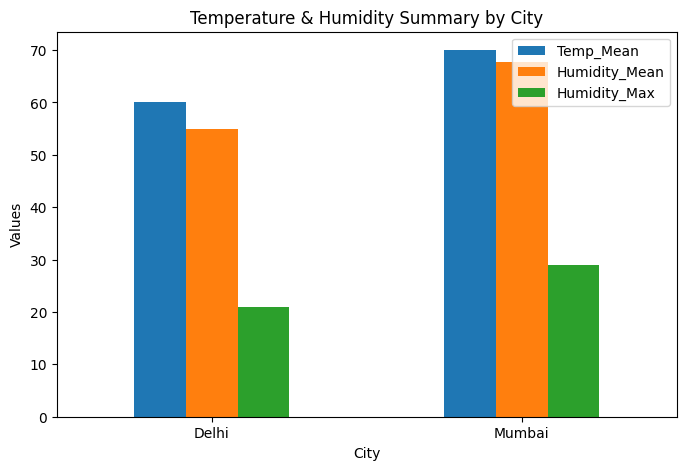

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Bar Chart
multi_agg_df.plot(kind="bar", figsize=(8,5))
plt.title("Temperature & Humidity Summary by City")
plt.ylabel("Values")
plt.xticks(rotation=0)
plt.show()
